# Car Price Prediction
### About the Project
In the automotive market, determining the fair price of a car can be challenging for both buyers and sellers. Prices can vary significantly based on factors such as make, model, year, mileage, and additional features. With such complexity, buyers often struggle to assess whether they are getting a good deal, while sellers may have difficulty setting competitive prices. This lack of transparency can lead to frustration and uncertainty in the car-buying process.

Our **main goal** is to harness the power of PyTorch neural networks to develop a regression model capable of accurately predicting car prices. By leveraging machine learning techniques and a comprehensive dataset, our objective is to create a tool that empowers both buyers and sellers with reliable price estimates.

### About the Data
The dataset used in this project was sourced from Kaggle's [Car Price Prediction Challenge](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge). It comprises a collection of car listings along with various features used for predicting car prices.

- **Price:** The price of the car (target variable).
- **Manufacturer:** The manufacturer of the car.
- **Category:** The category of the car.
- **Leather interior:** Indicates whether the car has leather interior or not.
- **Fuel type:** The type of fuel used by the car.
- **Cylinders:** The number of cylinders in the car's engine.
- **Gear box type:** The type of gear box used in the car.
- **Drive wheels:** The type of drive wheels in the car (e.g., front-wheel drive, rear-wheel drive).
- **Doors:** The number of doors in the car.
- **Wheel:** The type of wheel used in the car.
- **Color:** The color of the car.
- **Airbags:** The number of airbags in the car.
- **EngineVolume:** The volume of the car's engine.
- **Mileage:** The mileage of the car in kilometers.
- **Prod. year:** Year the car was produced.

### Objectives
- Explore and understand the dataset.
- Gain insights about cars and their prices.
- Create a simple neural network that can predict a car's price based on its features.

### Import data and packages

In [1]:
# Standard libraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kaggle API
from kaggle.api.kaggle_api_extended import KaggleApi

# Scikit-learn
from sklearn.preprocessing import LabelEncoder

# PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, random_split, DataLoader

In [2]:
# Connect to Kaggle API
api = KaggleApi()
api.authenticate()

# Download the dataset
api.dataset_download_files(
    dataset='deepcontractor/car-price-prediction-challenge',
    path='../artifacts/data/raw/',
    unzip=True
)

In [3]:
df = pd.read_csv('../artifacts/data/raw/car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### Explore data

In [4]:
# Check for missing values
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

313

In [6]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
# Number of unique values
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [8]:
# Statistics of features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [9]:
# Categories present in categorical features
object_columns = df.select_dtypes(include='object').columns

# Print unique values for the categorical features
for column in object_columns:
    print(f"Unique values for {column}:")
    print(df[column].unique())
    print("\n")

Unique values for Levy:
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '1141' '397' '784

### Data cleaning

In [10]:
interim_df = df.copy()
interim_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [11]:
# Drop ID, Model and Levy
interim_df.drop(['ID','Model','Levy'], axis=1, inplace=True)
interim_df.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,CHEVROLET,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,HONDA,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,FORD,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [12]:
# Make Engine volume numerical and create extra feature turbo.
numerical_values = []
turbo_indicator = []
engine_volume = interim_df['Engine volume']
for value in engine_volume:
    if 'Turbo' in value:
        numerical_values.append(float(value.split()[0]))
        turbo_indicator.append('Yes')
    else:
        numerical_values.append(float(value))
        turbo_indicator.append('No')

temp_df = pd.DataFrame({'EngineVolume': numerical_values, 'Turbo': turbo_indicator})
interim_df = pd.concat([interim_df, temp_df], axis=1)
interim_df.drop(['Engine volume'], axis=1, inplace=True)

In [13]:
# Make Mileage numerical
interim_df['Mileage_km'] = [int(value.split()[0]) for value in interim_df['Mileage']]
interim_df.drop(['Mileage'], axis=1, inplace=True)

In [14]:
# Change Prod. year to years (from current date)
current_year = datetime.datetime.now().year
interim_df['years'] = current_year - interim_df['Prod. year']
interim_df.drop(['Prod. year'], axis=1, inplace=True)

In [15]:
# Remove Outliers
# Remove significant extreme outliers from the dataset
# We will set multiplier=3 to capture them (we can adjust the multiplier)
def get_outliers_index(data, feature):
    """
    Returns the index of significant extreme outliers.
    """
    # Calculate the IQR
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds 
    #(4.5 in order to detect outliers significantly far from the median )
    lower_bound = Q1 - 4.5 * IQR
    upper_bound = Q3 + 4.5 * IQR

    # Identify extreme outliers
    extreme_outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    return extreme_outliers[[feature]].index

print("Shape before removing outliers:", interim_df.shape)
num_features = ['Price', 'EngineVolume', 'Mileage_km']
for feature in num_features:
    remove_lines = get_outliers_index(interim_df,feature)
    interim_df.drop(remove_lines,inplace=True)
print("Shape after removing outliers:", interim_df.shape)

Shape before removing outliers: (19237, 16)
Shape after removing outliers: (18919, 16)


In [16]:
print('Missing values:\n', interim_df.isna().sum())
print('Duplicated values:', interim_df.duplicated().sum())

Missing values:
 Price               0
Manufacturer        0
Category            0
Leather interior    0
Fuel type           0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
EngineVolume        0
Turbo               0
Mileage_km          0
years               0
dtype: int64
Duplicated values: 3482


In [17]:
# Drop duplicates
#interim_df.drop_duplicates(inplace=True)

In [18]:
interim_df.head()

,Price,Manufacturer,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,Turbo,Mileage_km,years
0,13328,LEXUS,Jeep,Yes,Hybrid,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,No,186005,14
1,16621,CHEVROLET,Jeep,No,Petrol,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,No,192000,13
2,8467,HONDA,Hatchback,No,Petrol,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1.3,No,200000,18
3,3607,FORD,Jeep,Yes,Hybrid,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,No,168966,13
4,11726,HONDA,Hatchback,Yes,Petrol,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,No,91901,10


In [19]:
print("Data before cleaning:", df.shape)
print("Data after cleaning:", interim_df.shape)

Data before cleaning: (19237, 18)
Data after cleaning: (18919, 16)


### Visualizations

In [20]:
def num_univ_plot(data, feature):
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'Histogram - {feature}')

    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=feature)
    plt.title(f'Boxplot - {feature}')
    
    plt.show()

def cat_univ_plot(data, feature):
    plt.figure(figsize=(10,4))
    sns.countplot(data=data, x=feature)
    plt.title(f'Countplot - {feature}')
    plt.xticks(rotation=90)
    plt.show()

def num_biv_plot(data, feature, target='Price'):
    if feature == target: return
    plt.figure(figsize=(10,4))
    sns.scatterplot(data=data, y=target, x=feature)
    plt.title(f'Scatterplot - {feature} vs {target}')
    plt.show()

def cat_biv_plot(data, feature, target='Price'):
    plt.figure(figsize=(10,4))
    sns.boxplot(data=data, y=target, x=feature, hue=feature)
    plt.title(f'Boxplot - {feature} vs {target}')
    plt.xticks(rotation=90)
    plt.show()

num_features = interim_df.select_dtypes(include='number').columns
cat_features = interim_df.select_dtypes(include='object').columns

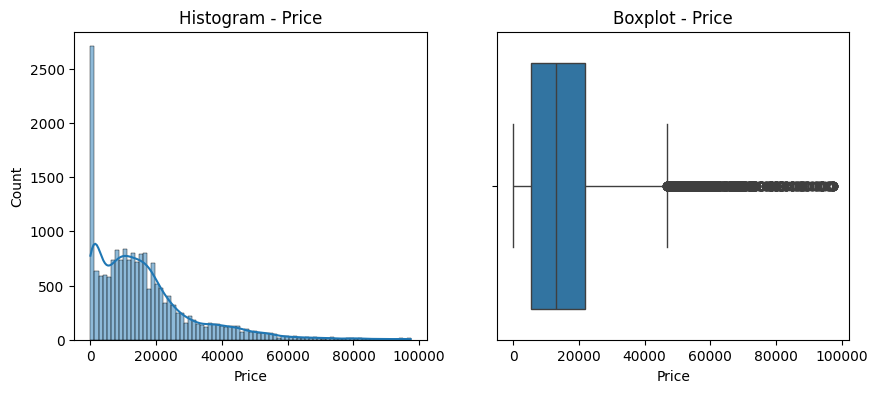

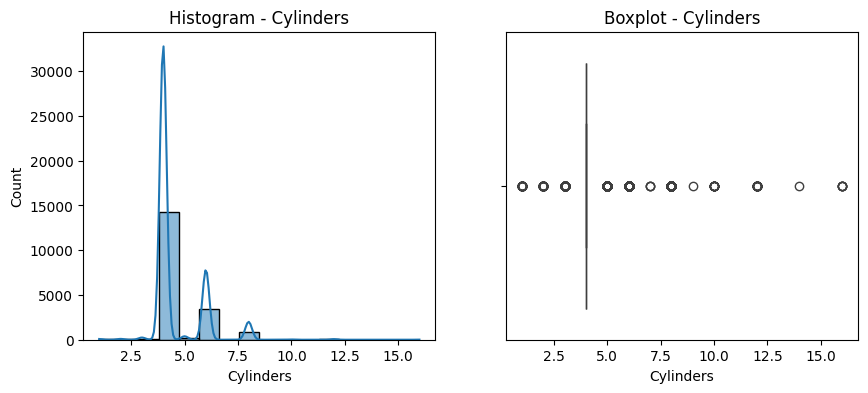

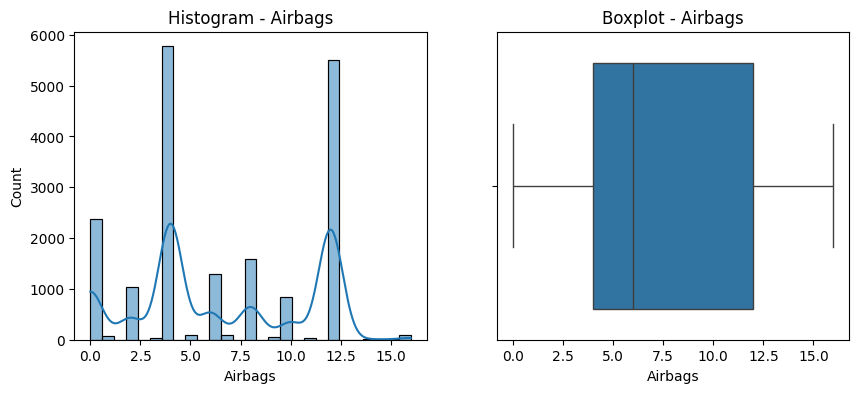

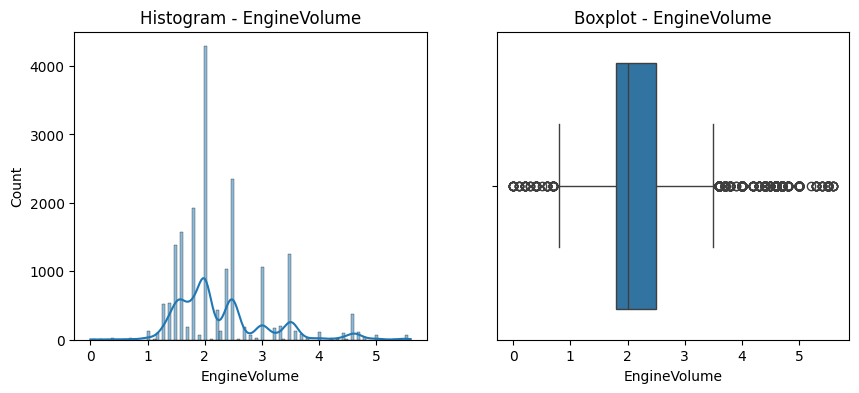

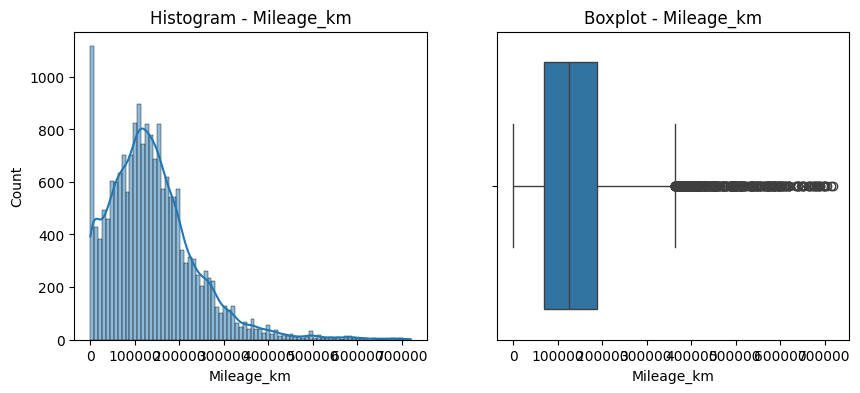

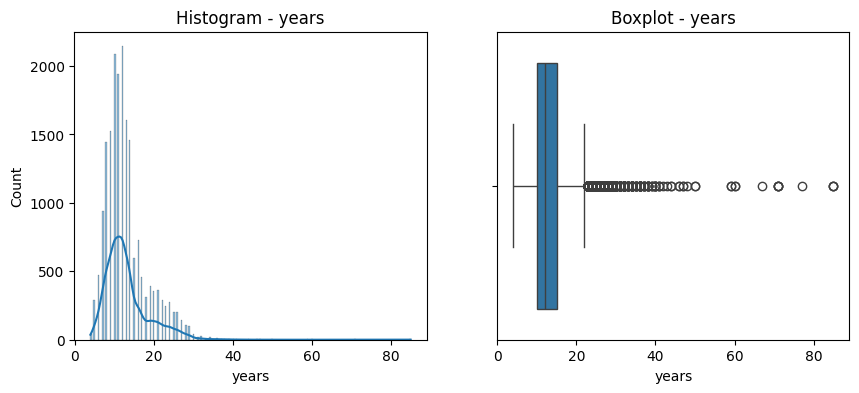

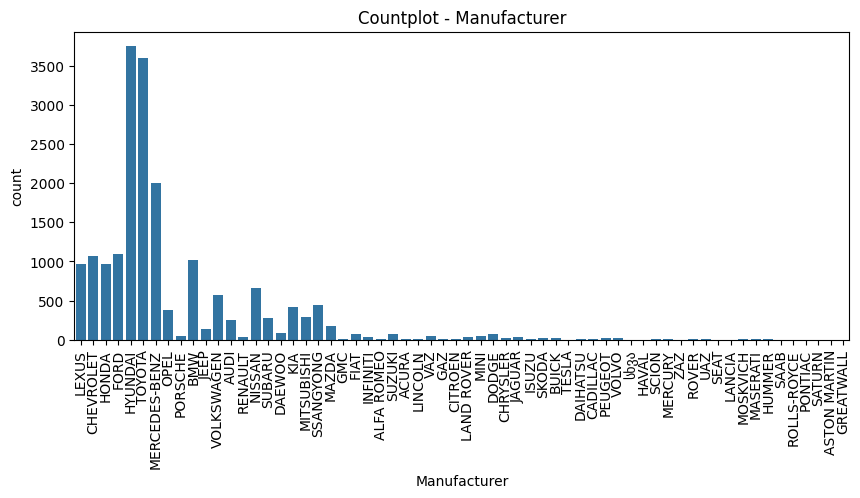

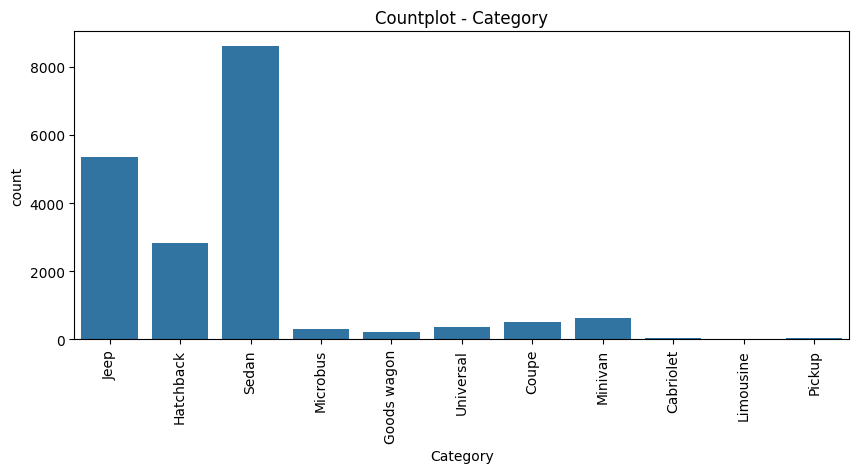

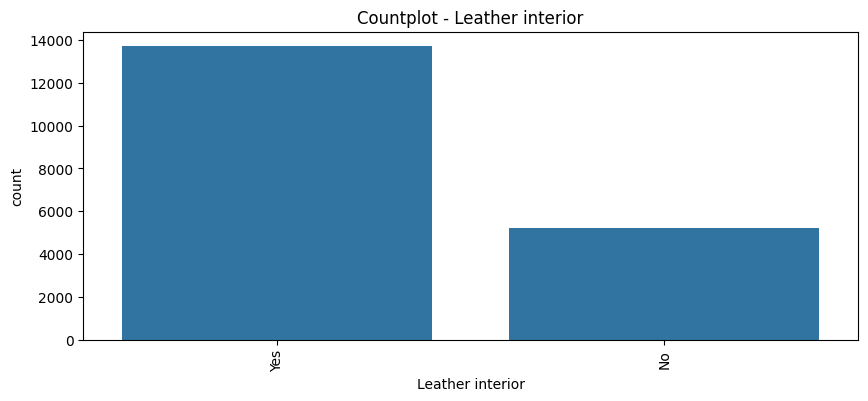

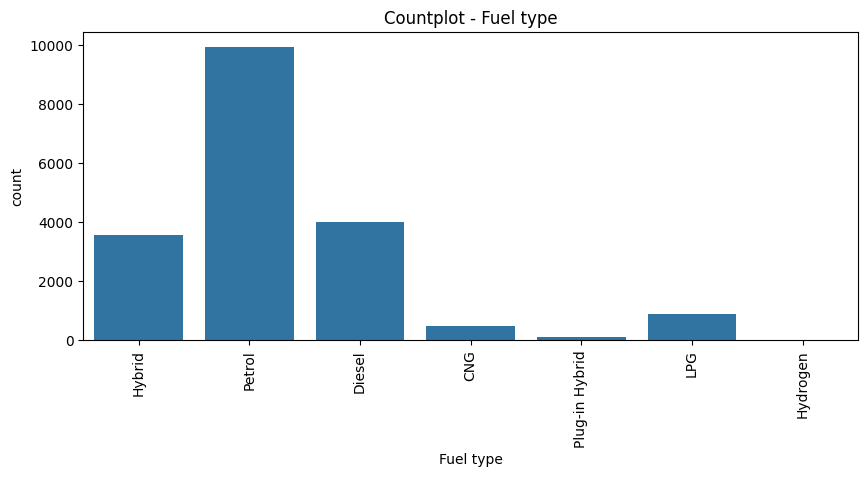

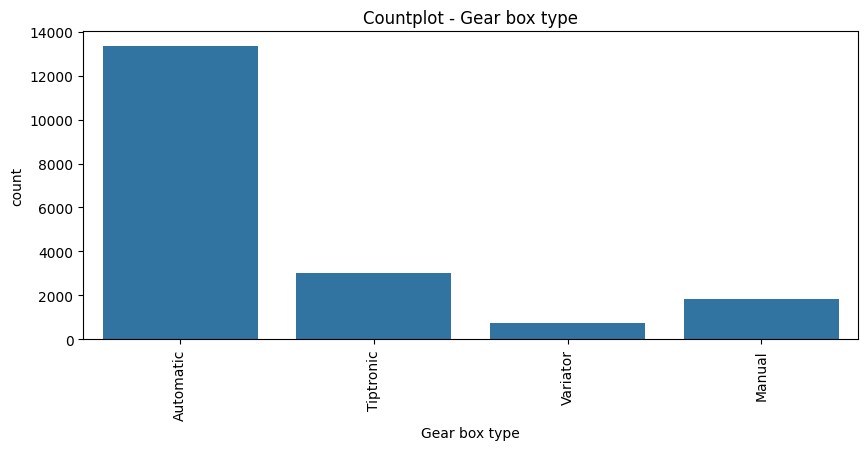

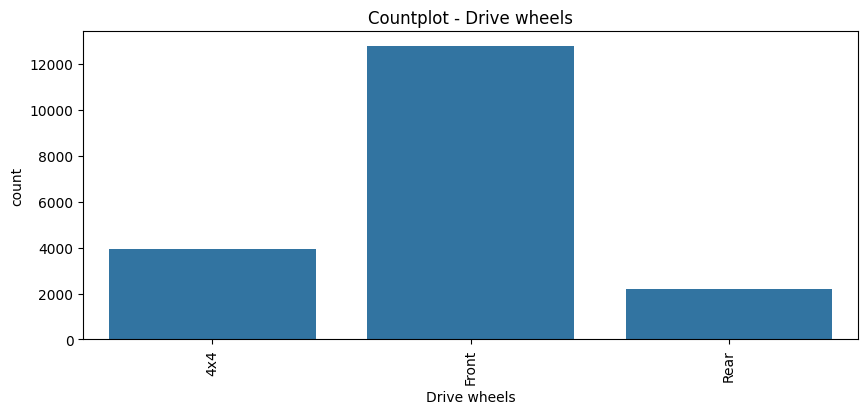

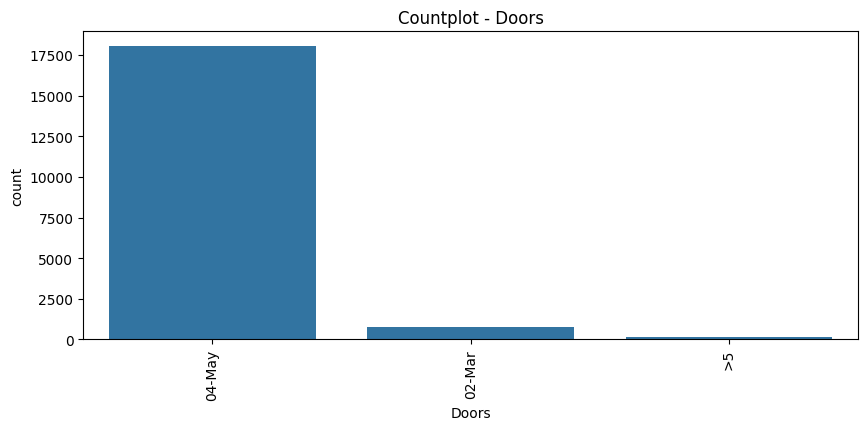

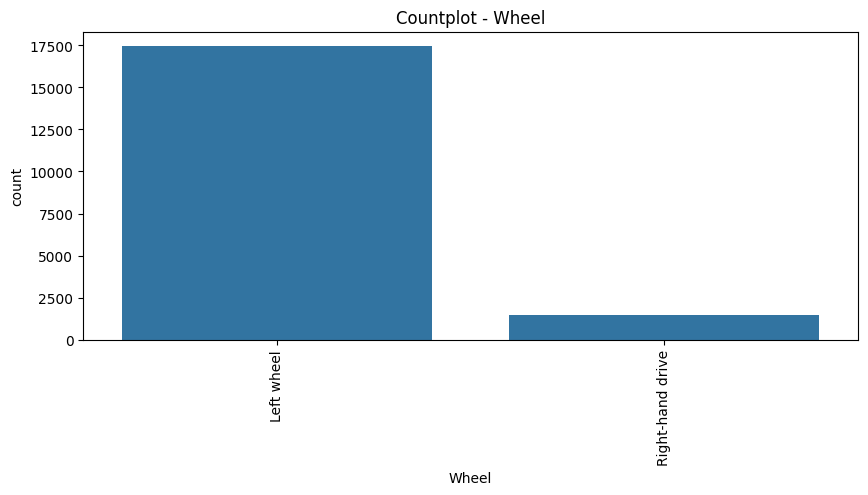

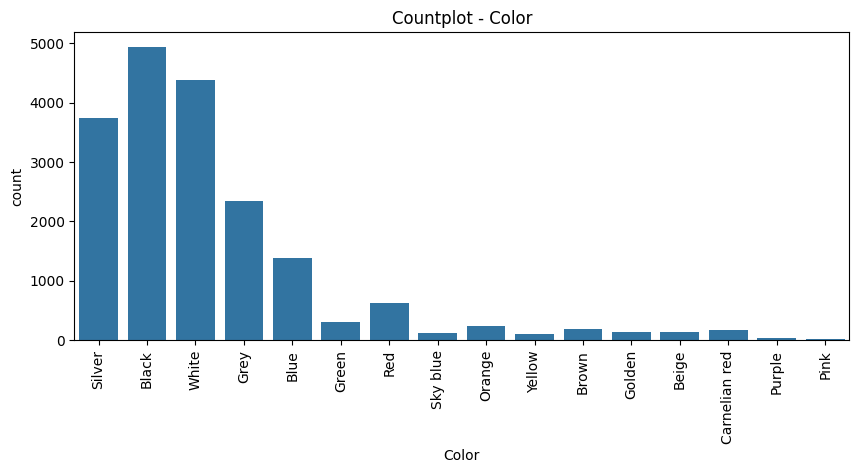

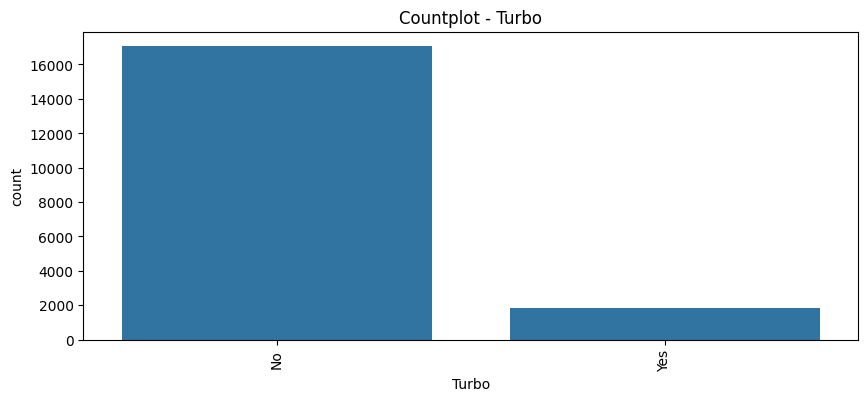

In [21]:
# Univariate analysis
for feature in num_features:
    num_univ_plot(interim_df, feature)

for feature in cat_features:
    cat_univ_plot(interim_df, feature)

##### Observations
- The majority of car prices fall within a range of a few thousand to around 60,000. However, there are some outliers. There are also many cars that their price was significantly low.
- Most cars in the dataset have a mileage of around 100,000 kilometers or more. But there is also a significant amount of cars with almost no km in record.
- The age of most cars ranges between 10 to 15 years.
- The dataset primarily consists of cars from manufacturers such as Hyundai, Toyota, and Mercedes.
- Petrol is the most common fuel type used by cars in the dataset.
- Automatic transmission is the predominant gearbox type among the cars.
- Front-wheel drive is the most common drive wheel configuration.
- The majority of cars in the dataset have 4 to 5 doors.
- Left-hand drive is the prevalent steering wheel configuration.
- The most common car colors are black, white, grey, silver, and blue.
- Turbocharged engines are not common among the cars in the dataset.

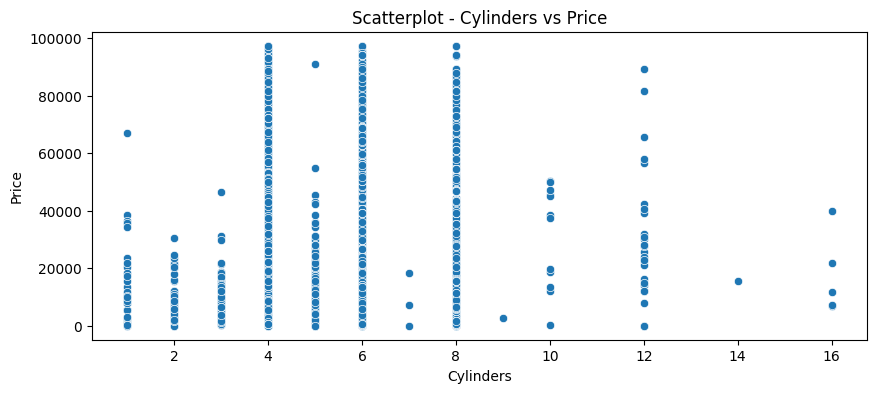

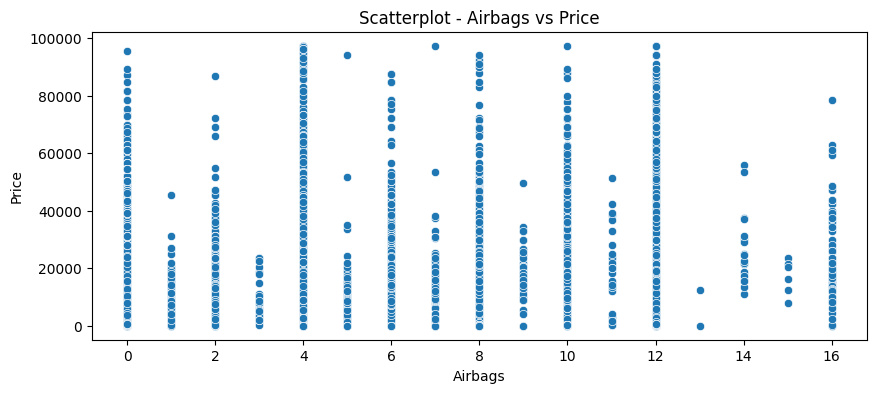

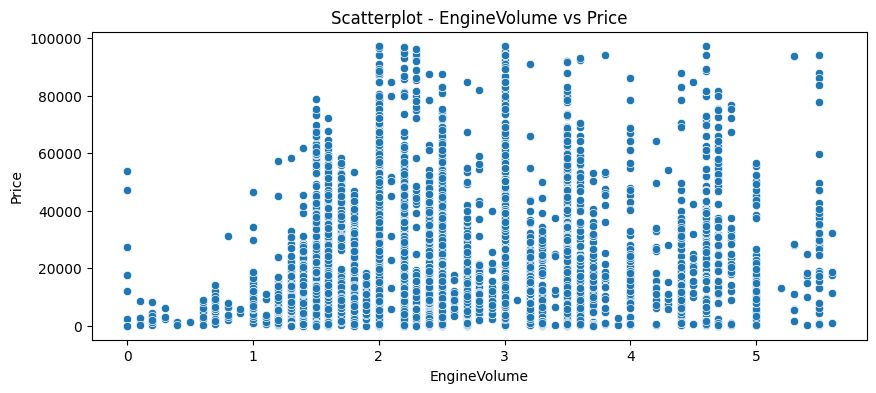

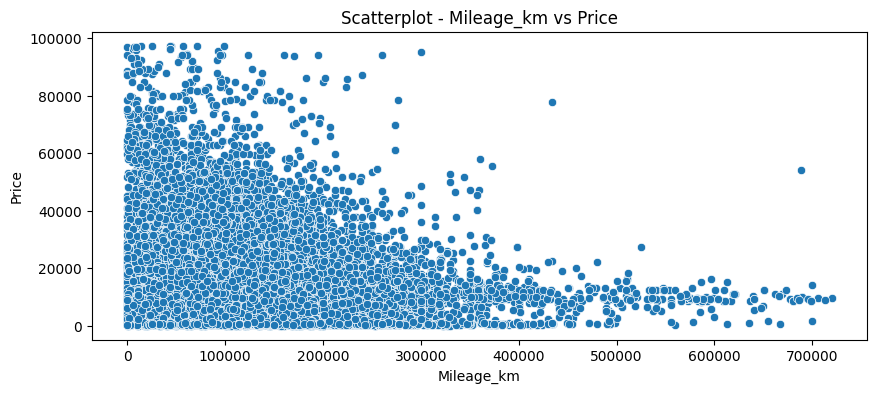

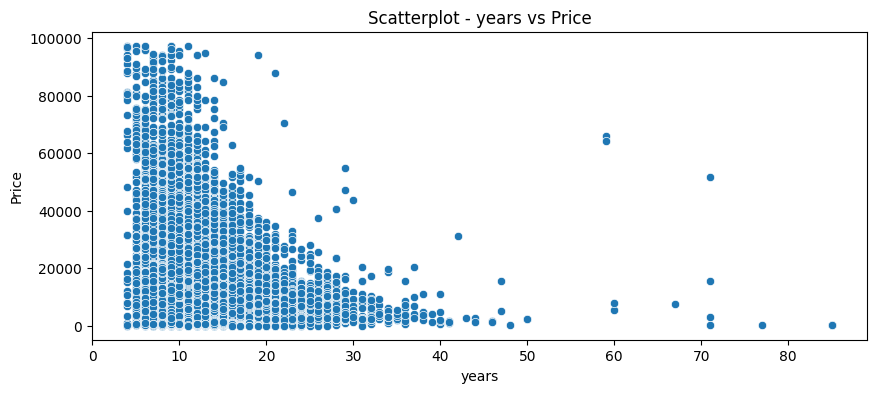

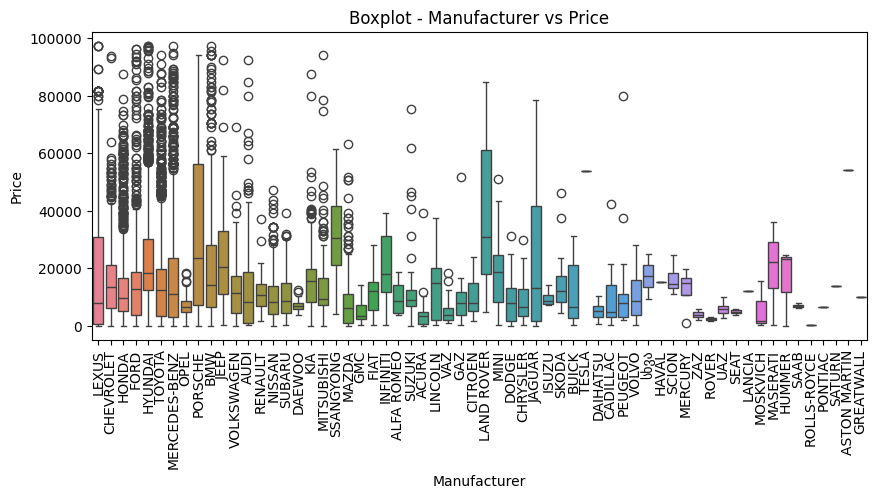

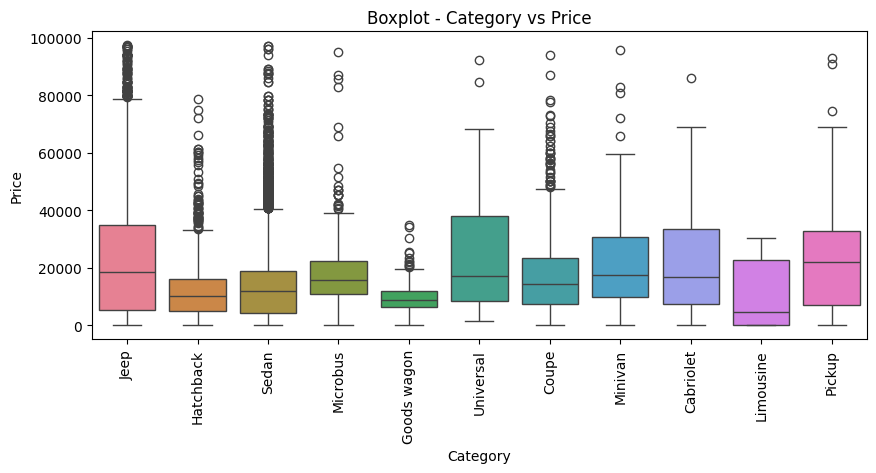

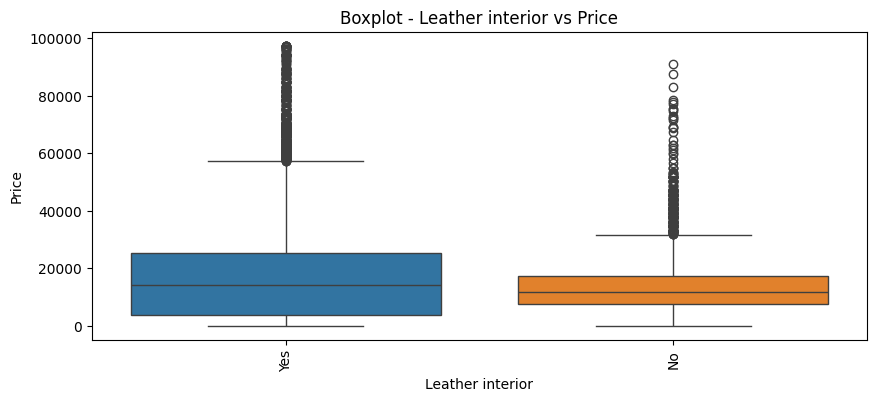

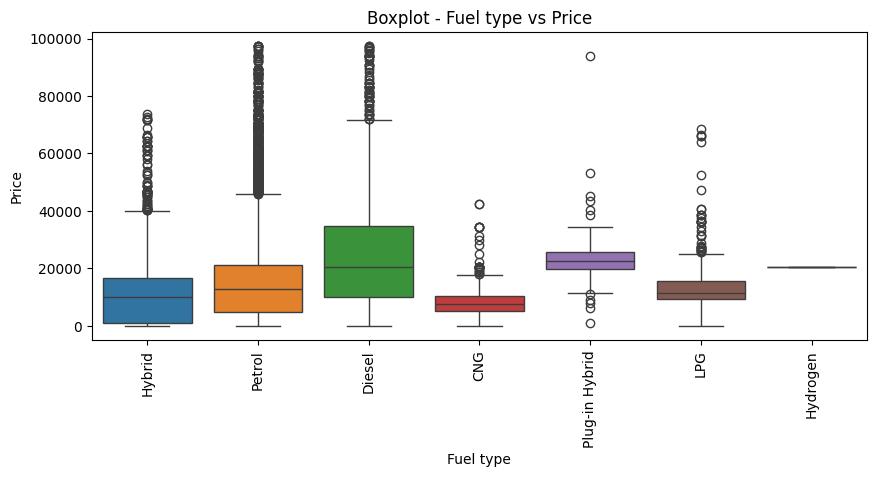

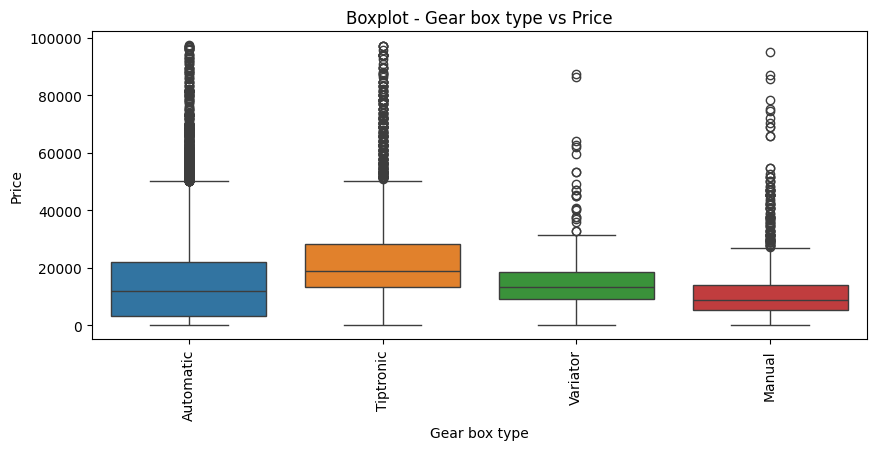

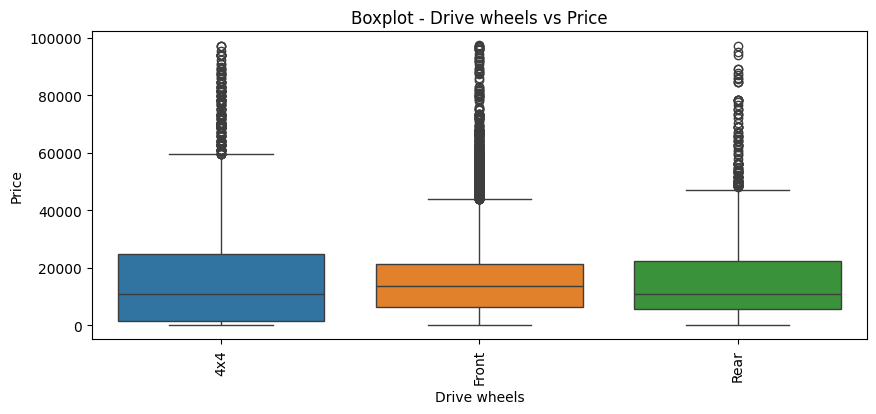

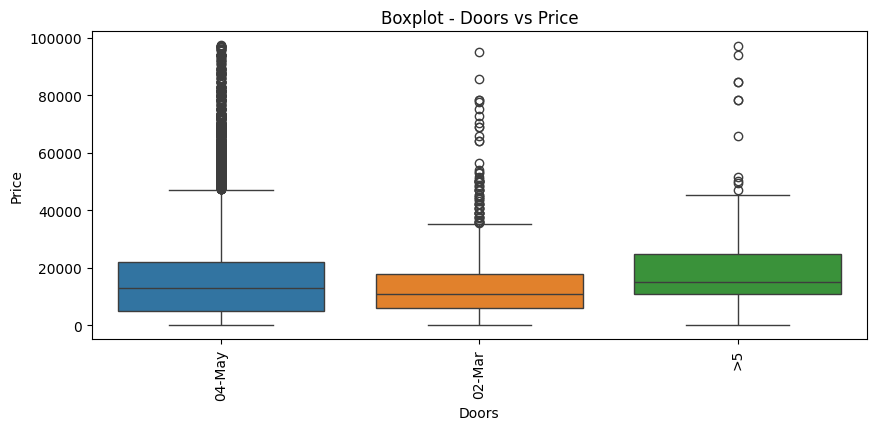

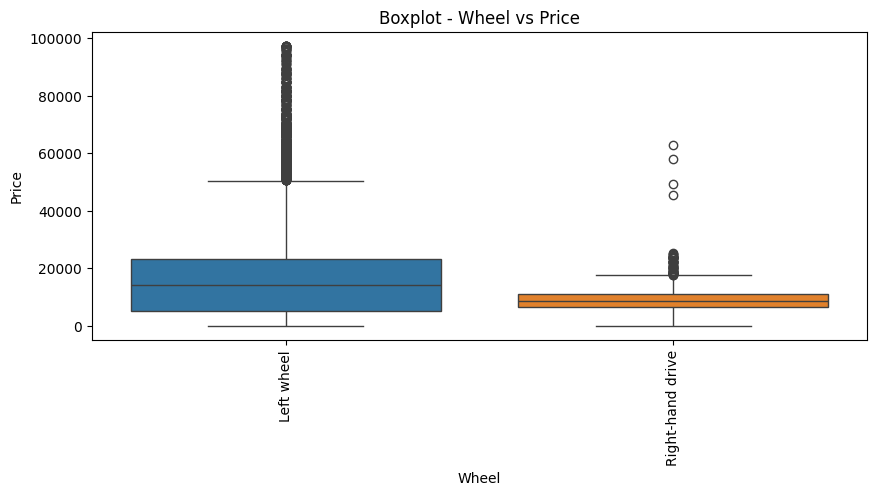

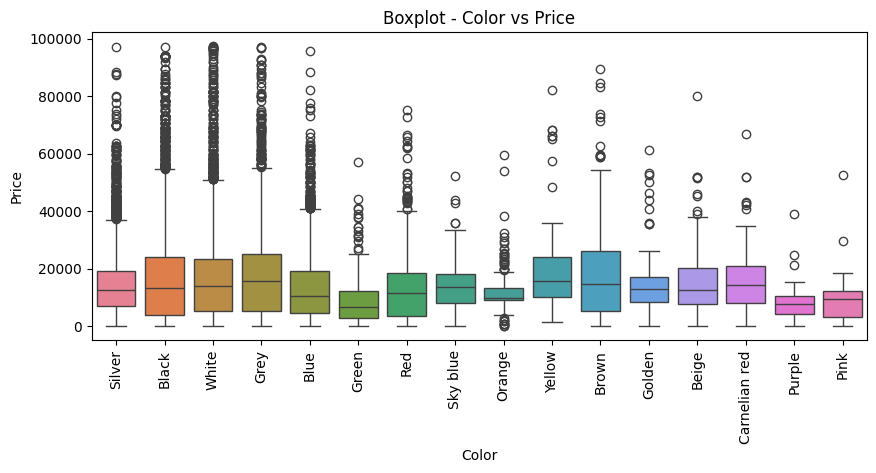

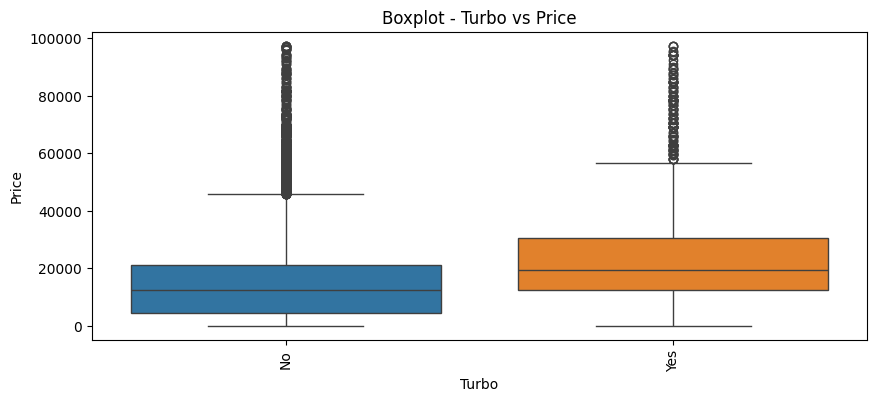

In [22]:
# Univariate analysis
for feature in num_features:
    num_biv_plot(interim_df, feature)

for feature in cat_features:
    cat_biv_plot(interim_df, feature)

##### Observations
- Cars with 4, 6, or 8 cylinders tend to achieve higher prices in some cases.
- Higher mileage generally correlates with lower prices.
- Cars that are relatively newer tend to have a wider price range.
- Manufacturers like Porsche and Land Rover exhibit a distribution with higher prices.
- Diesel cars generally have a distribution that skews towards higher prices, but petrol cars have many outliers with high prices.
- Cars equipped with a triptonic gearbox tend to have a higher distribution of prices.
- Right-hand drive cars are typically cheaper.
- Cars with turbocharged engines are often priced higher.

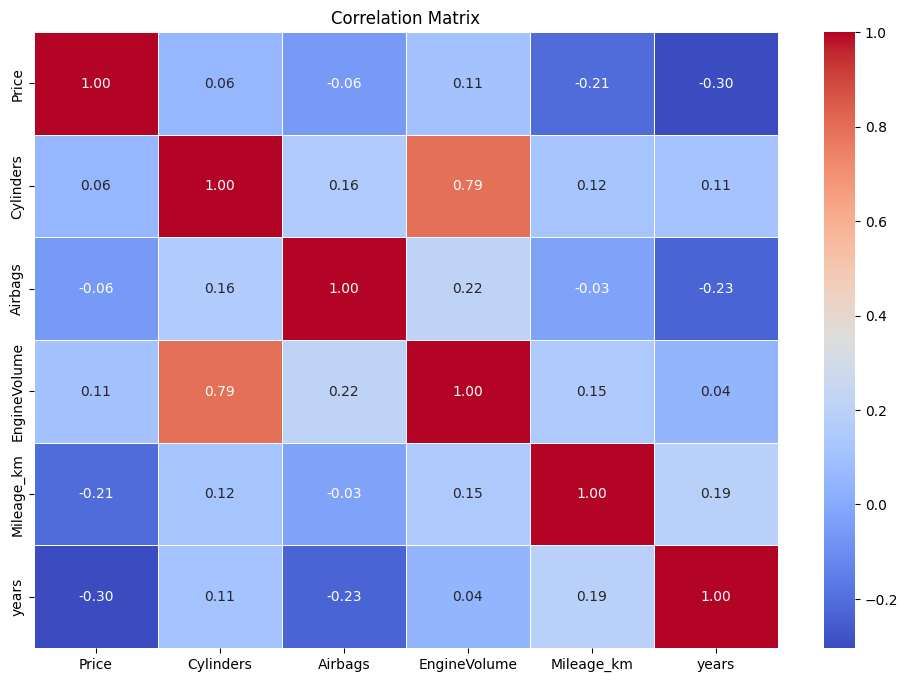

In [23]:
# Correlation map
corr_matrix = interim_df[num_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Feature engineering

In [24]:
processed_df = interim_df.copy()
processed_df.head()

,Price,Manufacturer,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,Turbo,Mileage_km,years
0,13328,LEXUS,Jeep,Yes,Hybrid,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,No,186005,14
1,16621,CHEVROLET,Jeep,No,Petrol,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,No,192000,13
2,8467,HONDA,Hatchback,No,Petrol,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1.3,No,200000,18
3,3607,FORD,Jeep,Yes,Hybrid,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,No,168966,13
4,11726,HONDA,Hatchback,Yes,Petrol,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,No,91901,10


In [25]:
# Get features type
target_feature = 'Price'
num_features = processed_df.drop(['Price'], axis=1).select_dtypes(include='number').columns
cat_features = processed_df.select_dtypes(include='object').columns

In [26]:
# Label encoding for categorical features
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature] = LabelEncoder()
    processed_df[feature] = lbl_encoders[feature].fit_transform(processed_df[feature])
lbl_encoders

{'Manufacturer': LabelEncoder(),
 'Category': LabelEncoder(),
 'Leather interior': LabelEncoder(),
 'Fuel type': LabelEncoder(),
 'Gear box type': LabelEncoder(),
 'Drive wheels': LabelEncoder(),
 'Doors': LabelEncoder(),
 'Wheel': LabelEncoder(),
 'Color': LabelEncoder(),
 'Turbo': LabelEncoder()}

In [27]:
# Create the embedding size for categorical features
cat_dims = [len(processed_df[feature].unique()) for feature in cat_features]
# Rule of thumb for embedding dim (by fastai)
embedding_dim = [(x, min(50, (x+1)//2)) for x in cat_dims]
print(cat_dims)
print(embedding_dim)

[62, 11, 2, 7, 4, 3, 3, 2, 16, 2]
[(62, 31), (11, 6), (2, 1), (7, 4), (4, 2), (3, 2), (3, 2), (2, 1), (16, 8), (2, 1)]


In [28]:
# Convert categorical data into tensor
cat_arr = processed_df[cat_features].to_numpy()
cat_tensor = torch.tensor(cat_arr, dtype=torch.int64)

# Convert numerical data into tensor
num_arr = processed_df[num_features].to_numpy()
num_tensor = torch.tensor(num_arr, dtype=torch.float)

# Convert target into tensor
target_arr = processed_df[target_feature].to_numpy()
y_tensor = torch.tensor(target_arr, dtype=torch.float).reshape(-1,1)

print("Categorical tensor:", cat_tensor)
print("Numerical tensor:", num_tensor)
print("Target tensor:", y_tensor)

Categorical tensor: tensor([[29,  4,  1,  ...,  0, 12,  0],
        [ 7,  4,  0,  ...,  0,  1,  0],
        [19,  3,  0,  ...,  1,  1,  0],
        ...,
        [21,  4,  1,  ...,  0,  7,  0],
        [ 7,  4,  1,  ...,  0,  1,  0],
        [21,  9,  1,  ...,  0, 14,  0]])
Numerical tensor: tensor([[6.0000e+00, 1.2000e+01, 3.5000e+00, 1.8600e+05, 1.4000e+01],
        [6.0000e+00, 8.0000e+00, 3.0000e+00, 1.9200e+05, 1.3000e+01],
        [4.0000e+00, 2.0000e+00, 1.3000e+00, 2.0000e+05, 1.8000e+01],
        ...,
        [4.0000e+00, 4.0000e+00, 2.0000e+00, 1.1636e+05, 1.4000e+01],
        [4.0000e+00, 4.0000e+00, 2.0000e+00, 5.1258e+04, 1.7000e+01],
        [4.0000e+00, 1.2000e+01, 2.4000e+00, 1.8692e+05, 1.2000e+01]])
Target tensor: tensor([[13328.],
        [16621.],
        [ 8467.],
        ...,
        [26108.],
        [ 5331.],
        [  470.]])


In [29]:
### Set train_data, val_data, test_data
dataset = TensorDataset(cat_tensor, num_tensor, y_tensor)
train_size = int(0.7 * len(dataset))  # 70% for training
val_size = int(0.15 * len(dataset))   # 15% for validation
test_size = len(dataset) - train_size - val_size # remaining for testing
train_data, val_data, test_data = random_split(dataset, [train_size, val_size, test_size])
print(train_data)
print(val_data)
print(test_data)

### Model Creation

In [30]:
### Model class
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_dim, layers, dout=0.5):
        super().__init__()
        # Create embedding layer
        self.embeds = nn.ModuleList([nn.Embedding(inp, out) for inp,out in embedding_dim])
        # Apply dropout (prevent overfitting)
        self.emb_drop = nn.Dropout(dout)
        # Apply batch normalization to numerical features
        self.bn_cont = nn.BatchNorm1d(n_cont)

        # Total dimension of embedding layers
        n_emb = sum((out for inp,out in embedding_dim))
        # Total input (embedding and continuous) 
        n_inp = n_emb + n_cont

        layerlist = []
        for i in layers:
            # Create Linear layer
            layerlist.append(nn.Linear(n_inp,i))
            # Add activation function
            layerlist.append(nn.ReLU(inplace=True))
            # Add batch normalization in the neurons
            layerlist.append(nn.BatchNorm1d(i))
            # Drop some neurons
            layerlist.append(nn.Dropout(dout))
            # The input for the next layer
            n_inp = i
        # Final layer - output layer
        layerlist.append(nn.Linear(layers[-1], out_dim))

        # Wrap the layers with Sequential
        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont): 
        # Create and concat embeddings
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x_cat = torch.cat(embeddings, 1)
        # Dropout
        x_cat = self.emb_drop(x_cat)
        # Batch normalization
        x_cont = self.bn_cont(x_cont)
        # Concat all features
        x = torch.cat([x_cat, x_cont], 1)
        # Return layer with input x
        layer = self.layers(x)
        
        return layer
    
### Parameters
# Set batches
BATCH_SIZE = 1024
# Set device
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# Set Label Encoders
LBL_ENCODERS = lbl_encoders
# Set dimensions  
NUM_DIMS= num_tensor.shape[1]
EMB_DIMS = embedding_dim
OUT_DIM = 1
# Set layers
LAYERS = [128,64]
# Set dropout
DROPOUT = 0.3
# Set epochs
NUM_EPOCHS = 1000
# Set learning Rate
LEARNING_RATE = 0.1

In [31]:
# Get train and val loaders
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

print(train_loader)
print(val_loader)

In [32]:
# Create model
torch.manual_seed(100)
model = FeedForwardNN(
    embedding_dim=embedding_dim, 
    n_cont=NUM_DIMS, 
    out_dim=OUT_DIM, 
    layers=LAYERS, 
    dout=DROPOUT
).to(DEVICE)

print("Device:", DEVICE)
print(model)

Device: cuda
FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(62, 31)
    (1): Embedding(11, 6)
    (2): Embedding(2, 1)
    (3): Embedding(7, 4)
    (4): Embedding(4, 2)
    (5-6): 2 x Embedding(3, 2)
    (7): Embedding(2, 1)
    (8): Embedding(16, 8)
    (9): Embedding(2, 1)
  )
  (emb_drop): Dropout(p=0.3, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=63, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)


In [33]:
# Choose loss funciton and optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

c:\Users\idale\anaconda3\envs\gpuenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
train_loss_list = []
val_loss_list = []

# Train model
for epoch in range(NUM_EPOCHS):
    total_loss = 0
    model.train()
    for batch_idx, (cat_data, num_data, target) in enumerate(train_loader):
        cat_data, num_data, target = cat_data.to(DEVICE), num_data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        prediction = model(cat_data, num_data)
        loss = torch.sqrt(loss_function(prediction, target))
        total_loss += loss
        loss.backward()
        optimizer.step()
    total_loss /= len(train_loader)
    train_loss_list.append(total_loss)
    
    # Get validation loss
    val_loss = 0
    model.eval()
    with torch.no_grad():
        for cat_data, num_data, target in val_loader:
            cat_data, num_data, target = cat_data.to(DEVICE), num_data.to(DEVICE), target.to(DEVICE)
            prediction = model(cat_data, num_data)
            val_loss += torch.sqrt(loss_function(prediction, target))
        val_loss /= len(val_loader)
        val_loss_list.append(val_loss)

    # Print epoch
    message = f'Epoch {epoch+1}/{NUM_EPOCHS}, train_Loss: {total_loss}, val_Loss: {val_loss:.4f}'
    print(message)

Epoch 1/1000, train_Loss: 22490.099609375, val_Loss: 22566.3047
Epoch 2/1000, train_Loss: 22241.861328125, val_Loss: 22298.4219
Epoch 3/1000, train_Loss: 21564.529296875, val_Loss: 20973.2988
Epoch 4/1000, train_Loss: 20371.298828125, val_Loss: 19949.6934
Epoch 5/1000, train_Loss: 18631.994140625, val_Loss: 17213.6992
Epoch 6/1000, train_Loss: 16381.755859375, val_Loss: 16647.0352
Epoch 7/1000, train_Loss: 13915.38671875, val_Loss: 14071.5918
Epoch 8/1000, train_Loss: 11665.8623046875, val_Loss: 10898.4141
Epoch 9/1000, train_Loss: 10379.25390625, val_Loss: 9818.1045
Epoch 10/1000, train_Loss: 9857.8642578125, val_Loss: 9044.4766
Epoch 11/1000, train_Loss: 9630.3154296875, val_Loss: 8720.1719
Epoch 12/1000, train_Loss: 9719.9873046875, val_Loss: 8735.1807
Epoch 13/1000, train_Loss: 9423.7958984375, val_Loss: 8680.1465
Epoch 14/1000, train_Loss: 9453.4384765625, val_Loss: 8699.1152
Epoch 15/1000, train_Loss: 9473.8974609375, val_Loss: 8481.1348
Epoch 16/1000, train_Loss: 9409.22265625, 

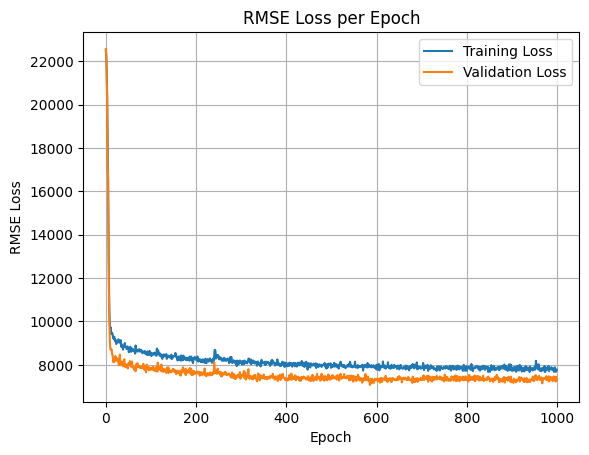

In [35]:
# Convert from tensor to numpy
train_loss_numpy = [loss.cpu().detach().numpy() for loss in train_loss_list]
val_loss_numpy = [loss.cpu().detach().numpy() for loss in val_loss_list]

# Plot epochs and losses
plt.plot(range(NUM_EPOCHS), train_loss_numpy, label='Training Loss')
plt.plot(range(NUM_EPOCHS), val_loss_numpy, label='Validation Loss')
plt.ylabel('RMSE Loss')
plt.xlabel('Epoch')
plt.title('RMSE Loss per Epoch')
plt.grid(True)
plt.legend()
plt.show()

### Model Evaluation

In [36]:
# Create data loader with entire test set (or batches)
test_loader = DataLoader(test_data, batch_size=len(test_data), shuffle=False)

# Set loss function
loss_function = nn.MSELoss()

model.eval()  # Set the model to evaluation mode
test_loss = 0
actual = []
predictions = []

# Model Evaluation
with torch.no_grad():
    for cat_data, num_data, target in test_loader:
        cat_data, num_data, target = cat_data.to(DEVICE), num_data.to(DEVICE), target.to(DEVICE)
        prediction = model(cat_data, num_data)
        loss = torch.sqrt(loss_function(prediction, target))
        test_loss += loss
        actual.append(target.cpu().numpy())
        predictions.append(prediction.cpu().numpy()) 
    #test_loss /= len(test_loader) # if we use batches

print("RMSE:", test_loss.item()) 


RMSE: 8100.5791015625


In [37]:
# Concatenate test data and predictions into a DataFrame
data_verify = pd.DataFrame(np.concatenate(actual), columns=["Test"])
data_predicted = pd.DataFrame(np.concatenate(predictions), columns=["Prediction"])
final_output = pd.concat([data_verify, data_predicted], axis=1)

# Calculate difference in price
final_output['Difference'] = final_output['Test'] - final_output['Prediction']
final_output.head(10)

,Test,Prediction,Difference
0,14113.0,8806.925781,5306.074219
1,20005.0,22814.363281,-2809.363281
2,16151.0,21067.070312,-4916.070312
3,220.0,6609.219727,-6389.219727
4,1411.0,4672.848633,-3261.848633
5,34184.0,54968.167969,-20784.167969
6,11604.0,4764.497070,6839.502930
7,34497.0,16221.486328,18275.513672
8,10976.0,9822.003906,1153.996094
9,25597.0,29881.267578,-4284.267578


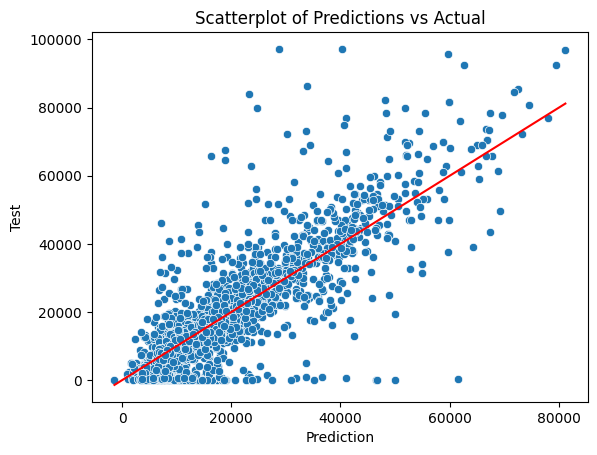

In [38]:
# Plot scatterplot pred vs actual
sns.scatterplot(data=final_output, x='Prediction', y='Test')
plt.title('Scatterplot of Predictions vs Actual')
plt.plot([final_output['Prediction'].min(), final_output['Prediction'].max()],
         [final_output['Prediction'].min(), final_output['Prediction'].max()], color='red')
plt.show()

## Conclusion

### Data Insights
1. **Price Range and Outliers**: The majority of car prices fall within a range of a few thousand to around 60,000. However, there are some outliers, indicating that certain cars may command significantly higher prices due to unique features or rarity.

2. **Mileage and Price Correlation**: There is a noticeable correlation between mileage and price, with higher mileage generally resulting in lower prices. This suggests that buyers often perceive lower mileage cars as more valuable and are willing to pay a premium for them.

3. **Age and Price Variability**: Cars that are relatively newer tend to have a wider price range. This variability may be attributed to factors such as model popularity, condition, and specific features.

4. **Manufacturer Influence**: Manufacturers like Porsche and Land Rover exhibit a distribution with higher prices. This indicates that cars from certain manufacturers may command premium prices due to factors such as brand reputation, luxury features, and performance.

5. **Fuel Type and Price Dynamics**: Diesel cars generally have a distribution that skews towards higher prices, while petrol cars have many outliers with high prices. This suggests that the choice of fuel type can significantly impact the perceived value and pricing of a car.

6. **Gearbox Type and Price Distribution**: Cars equipped with a triptonic gearbox tend to have a higher distribution of prices. This implies that certain gearbox types may be associated with higher perceived value or performance, influencing pricing decisions.

7. **Steering Wheel Configuration and Price**: Right-hand drive cars are typically cheaper, indicating that market demand and availability of left-hand drive cars may influence pricing dynamics in certain regions.

8. **Engine Type and Price Premium**: Cars with turbocharged engines are often priced higher, highlighting the association between engine performance and pricing. Buyers may be willing to pay a premium for increased power and acceleration provided by turbocharged engines.

These insights offer valuable perspectives on the pricing dynamics and key factors influencing car prices within the dataset.

### Model
Our model utilizes a simple **neural network architecture implemented using PyTorch**, trained on a comprehensive dataset from Kaggle. With input, hidden, and output layers, the model employs fully connected linear units and activation functions to capture intricate data patterns. Through iterative training using techniques like gradient descent, it minimizes prediction errors. During training, features are preprocessed, scaled, and encoded for optimal performance. Leveraging PyTorch's efficiency, the model iteratively learns from the data. With a **Mean Root Squared Error (MRSE) of 8100**, our model showcases a good accuracy in predicting car prices, underscoring its effectiveness in capturing the nuanced relationships between car features and prices.
